<a href="https://colab.research.google.com/github/hdakhli/mlops-2023/blob/main/1_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploration des données
Le but étant de prédire si un patient est potentiellement atteint du Covid 19

### installation de bibliothèque:


In [302]:
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn
#!pip install python-magic
#!pip install scikit-learn
#!pip install numpy

### import les bibliothèque de projet:

In [303]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import itertools

### Chargement de Dataset

In [304]:
# Charger les données covid 19 dans une dataframe
Data_covid = pd.read_csv("/content/covid.csv", encoding='ISO-8859-1' ,sep=',')
Data_covid.head()



,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
# Analyser les données: afficher le nombre de lignes / colonne, identifier la colonne target,
dim = df_covid.shape
nb_ligne = dim[0]
nb_colon = dim[1]
colon_target = df_covid["SARS-Cov-2 exam result"]
colon_target


0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [306]:
# Examiner la colonne target: calculer le nombre de cas positif et negatif
nb_positif_negatif = df_covid["SARS-Cov-2 exam result"].value_counts()
nb_positif_negatif



negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [307]:
# Calculer pourcentage des valeurs manquantes dans chaque colonne: missing_rate = df.isna().sum() / nombre d'element dans la

missing_rate = (df_covid.isna().sum() / len(df_covid)) * 100
type(missing_rate[100])



numpy.float64

In [308]:
# L'analyse des données nous a permis d'identifier 2 types d'examen qui sont effectué: Analyse de sang et Tests viraux
# Lister les colonnes de type, attention, je parle bien de list []:
# blood_columns:
    # (missing_rate < 0.9) & (missing_rate > 0.88)
# viral_columns
    # (missing_rate < 0.80) & (missing_rate > 0.75)


list_colon = list(map(str, df_covid.columns))
list_blood_columns =[]
list_viral_columns =[]
for i in range(len(list_colon)):
  if float(missing_rate[i])<90 and float(missing_rate[i])>88:
    list_blood_columns.append(list_colon[i])
  elif float(missing_rate[i])<80 and float(missing_rate[i])>75:
    list_viral_columns.append(list_colon[i])
print(len(list_blood_columns))
print(list_blood_columns)
print(len(list_viral_columns))
print(list_viral_columns)

14
['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)']
17
['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']


In [309]:
# Créer un dataframe finale contenant les colonnes : key_columns, blood_columns, viral_columns
# Où : key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']



# Sélectionner les colonnes "key_columns", "blood_columns" et "viral_columns"

key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']
Data_final = pd.concat([Data_covid[key_columns], Data_covid[list_blood_columns], Data_covid[list_viral_columns]], axis=1)
Data_final.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


#
### TrainTest - Nettoyage - Encodage

In [310]:
# Remplacer toutes les colonnes viral_columns par une seule "est_malade" avec la valeur 1 si au moins un virus est detecté et 0 sinon, vous pourrez faire la somme des valeurs d'une liste de colonnes par échantillon df['col1', 'col2'].sum(axis=1)

Data_final['est_malade'] = Data_final[list_viral_columns].sum(axis=1)
Data_final.drop(list_viral_columns, axis=1, inplace=True)

Data_final['est_malade'].replace({2:1, 3:1}, inplace= True)
Data_final.head()


<ipython-input-310-20bfd4f36650>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Data_final['est_malade'] = Data_final[list_viral_columns].sum(axis=1)


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),est_malade
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [311]:
# Supprimer toutes les lignes ne contenant pas de valeur
Data_final.dropna(axis=0, inplace=True)
Data_final


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),est_malade
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0
8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,9,negative,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.0
18,11,negative,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.0
22,9,negative,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,negative,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0.0
5614,19,negative,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0.0
5615,15,negative,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0.0
5618,17,negative,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0.0


In [312]:
# Utiliser la fonction train_test_split de sikit learn pour créer un dataset d'entrainement (trainset) et un dataset de test (testset). La taille du testset doit de 20%
X_data = Data_final.drop('SARS-Cov-2 exam result',axis=1)
Y_data = Data_final["SARS-Cov-2 exam result"]
trainset, testset, Y_train, Y_test = train_test_split(X_data, Y_data, test_size= 0.2, random_state=7)

In [313]:
# Vérifier que le rapport des cas postifs et negatif est le même dans les 2 sets

print(Y_test.value_counts()[1]/Y_test.value_counts()[0])
print(Y_train.value_counts()[1]/Y_train.value_counts()[0])

0.15384615384615385
0.15738498789346247


In [314]:
# Créer les dataframe X_train contenant uniquement les features et un autre y_train contenant uniquement le target à partir du trainset

X_train = trainset
y_train = Y_train



In [315]:
# Créer les dataframe X_test contenant uniquement les features et un autre y_test contenant uniquement le target à partir du testset
X_test = testset
y_test = Y_test

In [316]:
# Utiliser l'estimateur RandomForestClassifier pour l'entrainement (model.fit(X_train, y_train))
# Doc : https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles
# Evaluer le model avec les données de test:  ypred = model.predict(X_test)
# Afficher la matrice de confusion et le rapport de classification (from sklearn.metrics import confusion_matrix, classification_report)


model = RandomForestClassifier(n_estimators=15)
model= model.fit(X_train, y_train)
ypred = model.predict(X_test)

# matrice de confusion:
confusion = confusion_matrix(Y_test, ypred)
report = classification_report(Y_test, ypred)
print("matrice de confusion est:")
print(confusion)
print("le rapport de classification")
print(report)


matrice de confusion est:
[[102   2]
 [ 11   5]]
le rapport de classification
              precision    recall  f1-score   support

    negative       0.90      0.98      0.94       104
    positive       0.71      0.31      0.43        16

    accuracy                           0.89       120
   macro avg       0.81      0.65      0.69       120
weighted avg       0.88      0.89      0.87       120



Confusion matrix, without normalization
[[102   2]
 [ 11   5]]
[[102   2]
 [ 11   5]]


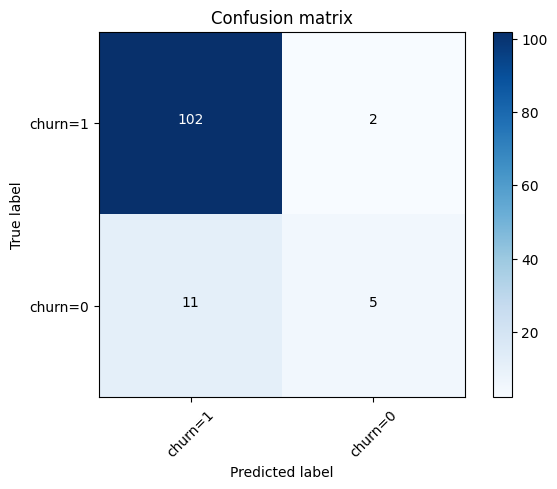

In [317]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(Y_test, ypred))

# Compute confusion_____________________________________________________________________________________

cnf_matrix = confusion_matrix(Y_test, ypred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [318]:
# Quels sont les métriques qu'il faut surveiller? pourquoi ?